In [1]:
import pandas as pd
from google.cloud import storage
import io
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Initialize the Google Cloud Storage client
client = storage.Client()

# Reference the bucket and the folder where your data is stored
bucket_name = 'ethereum-research'
folder_name = 'mainnet_data'
bucket = client.get_bucket(bucket_name)

In [3]:
# List all blobs (files) in the folder
blobs = bucket.list_blobs(prefix=folder_name)

# Initialize an empty DataFrame to hold the combined data
all_data = pd.DataFrame()

# Iterate through all blobs (files)
for blob in blobs:
    if blob.name.endswith('.csv'):  # Process only CSV files
        # Download the CSV file as a string
        print(blob)
        csv_data = blob.download_as_text()

        # Read the CSV into a pandas DataFrame
        data = pd.read_csv(io.StringIO(csv_data))

        # Append the data to the master DataFrame
        all_data = pd.concat([all_data, data], ignore_index=True)

<Blob: ethereum-research, mainnet_data/mainnet-000000000000.csv, 1726754289154331>
<Blob: ethereum-research, mainnet_data/mainnet-000000000001.csv, 1726754288996183>
<Blob: ethereum-research, mainnet_data/mainnet-000000000002.csv, 1726754289111089>
<Blob: ethereum-research, mainnet_data/mainnet-000000000003.csv, 1726754288863395>
<Blob: ethereum-research, mainnet_data/mainnet-000000000004.csv, 1726754289041666>
<Blob: ethereum-research, mainnet_data/mainnet-000000000005.csv, 1726754289059135>
<Blob: ethereum-research, mainnet_data/mainnet-000000000006.csv, 1726754289016507>
<Blob: ethereum-research, mainnet_data/mainnet-000000000007.csv, 1726754288854649>
<Blob: ethereum-research, mainnet_data/mainnet-000000000008.csv, 1726754288889507>
<Blob: ethereum-research, mainnet_data/mainnet-000000000009.csv, 1726754288947790>
<Blob: ethereum-research, mainnet_data/mainnet-000000000010.csv, 1726754288670978>
<Blob: ethereum-research, mainnet_data/mainnet-000000000011.csv, 1726754288793007>
<Blo

In [4]:
all_data.sort_values("block_timestamp")

,block_number,block_timestamp,transaction_hash,nonce,from_address,to_address,value,value_lossless,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
5086616,7870426,2019-06-01 00:00:04 UTC,0x5d292f7cbfb0454f6a0500d22a70bbc969438dfa8d9a...,35,0xe5cc96e045d32a4e8eb3bdd38e5316d4be09b459,0x4b14f1aaa878ccf70d58aec682592dcd0fe025ba,0,0,300000,20000000000,NaN,NaN,0
6202105,7870426,2019-06-01 00:00:04 UTC,0xf7d5da728ca842f3ff3ff6833ba80ff4b8aed3aeb9b6...,548,0x78163790e6d41bc6c6893e509c8d98903fb6af3b,0x88f70a4aadfe8898d7942944c2d5263f771edc1f,0,0,60000,5000000000,NaN,NaN,0
13221544,7870426,2019-06-01 00:00:04 UTC,0x77db90637f9c0239c6482ed09c823ef6e53eaa82bd1c...,18152,0x34df95e7ec433edbc270ca2e5d74fda8c3f898d4,0x1bcbcaa9142721b6f840de0ffa2c1516496b06fb,300000000000000000,300000000000000000,21000,5000000000,NaN,NaN,0
8697374,7870426,2019-06-01 00:00:04 UTC,0xd20efdd850147efd65b7c55a51d6b3bc758d917daf47...,13159,0xa4f31b80e0d5720e392f7f294375c3a28bc78211,0x5ea1090f113bb716461e0a61db5d501459be7430,992565140000000000,992565140000000000,44000,6000000000,NaN,NaN,0
662686,7870426,2019-06-01 00:00:04 UTC,0xb5f596bf1bd4ac7b2563c19341e69dee7ac3884b2699...,5816,0x0339b972ac1e7e2dc850079251755f732af5f581,0xcff655ee10ced870d3e77d5fcc41ca908ae42906,1000000000000000,1000000000000000,21000,5000000000,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12574708,8062292,2019-06-30 23:59:56 UTC,0x6f17d5a50f77be164489692771515661654301c2a48b...,9800,0x55b4dc1873b2b2d54e75fabcde78160a37498a06,0x30e0130141b3f113480a5941ca180ad8c5f98612,5000000000000000,5000000000000000,761020,2420000000,NaN,NaN,0
2759063,8062292,2019-06-30 23:59:56 UTC,0x69d5d000ac35ecaeeddfa4c645b1ef7f8f4218162d06...,0,0x77b65766b51ec1575147308a63f4a927e3dc2d82,0x6f50c6bff08ec925232937b204b0ae23c488402a,12349580000000000000,12349580000000000000,21000,20000000000,NaN,NaN,0
8621323,8062292,2019-06-30 23:59:56 UTC,0x3fe0efc8c92bc82d4d8a693abe2f7bca4a11d469deda...,14,0x7571f30e3d462172f4e6dacfc92054c90c9b139a,0x1ec4d06b2296da6ce7285086f9bc1521238b5a93,0,0,60000,10000000000,NaN,NaN,0
4346187,8062292,2019-06-30 23:59:56 UTC,0x2d4a94e5ad4c4945e4a7def1aca8da5e845cc3a70be3...,9801,0x55b4dc1873b2b2d54e75fabcde78160a37498a06,0x30e0130141b3f113480a5941ca180ad8c5f98612,5000000000000000,5000000000000000,760280,3000000000,NaN,NaN,0


In [5]:
df = all_data.copy(deep=True)

In [6]:
# Aggregate by block
summary = df.groupby(['block_number', 'block_timestamp']).agg({'transaction_hash':'count', 'gas':'sum', 'gas_price':'mean'}).reset_index()

# create fill rate metric
summary['block_timestamp'] = pd.to_datetime(summary['block_timestamp'])
summary['last_block_timestamp'] = summary['block_timestamp'].shift(1)
summary['fill_rate'] = (summary['block_timestamp']  - summary['last_block_timestamp']).dt.total_seconds()

In [7]:
summary = summary.rename(columns={'transaction_hash': 'total_transactions',\
                                  'gas': 'total_gas',\
                                  'gas_price': 'avg_gas_price',\
                                 })


In [8]:
# adjust scale of cols to be more readable 
#divide by 1M
summary['total_gas'] = summary['total_gas'] / 1000000
#divide by 1B
summary['avg_gas_price'] = summary['avg_gas_price'] / 1000000000

In [9]:
summary

,block_number,block_timestamp,total_transactions,total_gas,avg_gas_price,last_block_timestamp,fill_rate
0,7870426,2019-06-01 00:00:04+00:00,44,8.236470,15.286364,NaT,NaN
1,7870427,2019-06-01 00:00:15+00:00,60,10.290571,20.028819,2019-06-01 00:00:04+00:00,11.0
2,7870428,2019-06-01 00:00:21+00:00,25,1.390000,21.512000,2019-06-01 00:00:15+00:00,6.0
3,7870430,2019-06-01 00:01:03+00:00,189,18.849527,20.244601,2019-06-01 00:00:21+00:00,42.0
4,7870431,2019-06-01 00:01:07+00:00,188,14.653902,8.504159,2019-06-01 00:01:03+00:00,4.0
...,...,...,...,...,...,...,...
186460,8062288,2019-06-30 23:59:19+00:00,60,8.781241,11.470169,2019-06-30 23:59:13+00:00,6.0
186461,8062289,2019-06-30 23:59:22+00:00,124,13.053868,13.531462,2019-06-30 23:59:19+00:00,3.0
186462,8062290,2019-06-30 23:59:49+00:00,17,8.015277,2.294118,2019-06-30 23:59:22+00:00,27.0
186463,8062291,2019-06-30 23:59:51+00:00,1,0.090000,33.333333,2019-06-30 23:59:49+00:00,2.0


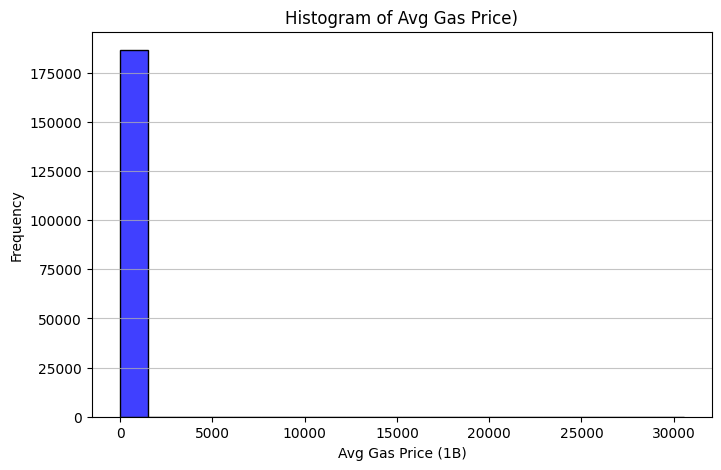

In [ ]:
# Plot histogram using seaborn
plt.figure(figsize=(8, 5))
sns.histplot(summary['avg_gas_price'].dropna(), bins=20, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of Avg Gas Price)')
plt.xlabel('Avg Gas Price (1B)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

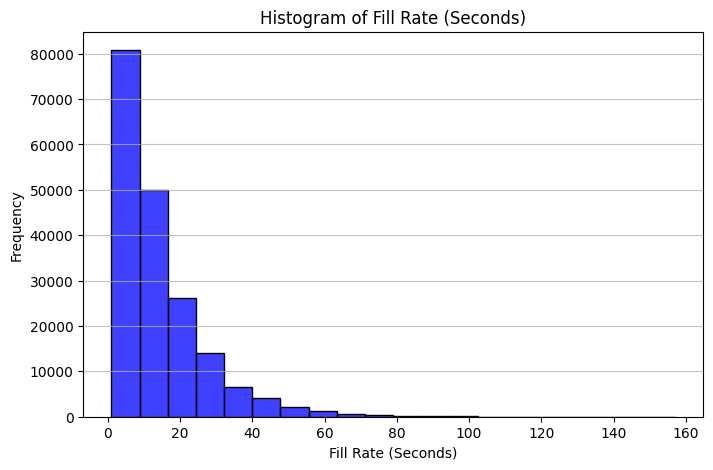

In [10]:
# Plot histogram using seaborn
plt.figure(figsize=(8, 5))
sns.histplot(summary['fill_rate'].dropna(), bins=20, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of Fill Rate (Seconds)')
plt.xlabel('Fill Rate (Seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

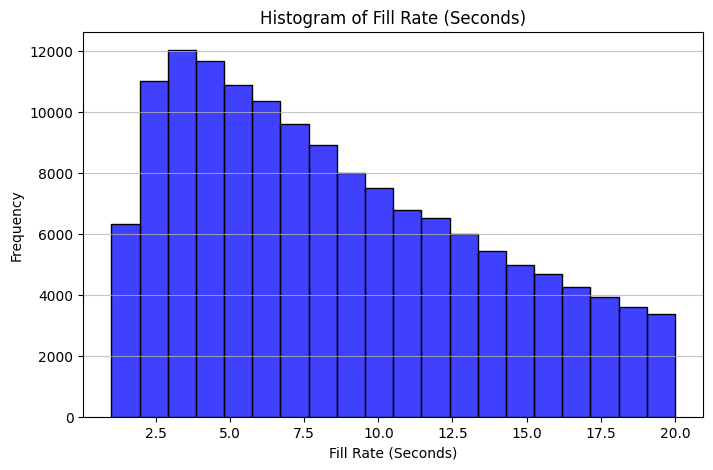

In [11]:
filtered_summary = summary[summary['fill_rate'] < 21]
# Plot histogram using seaborn
plt.figure(figsize=(8, 5))
sns.histplot(filtered_summary['fill_rate'].dropna(), bins=20, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of Fill Rate (Seconds)')
plt.xlabel('Fill Rate (Seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
# Round block timestamp to the nearest minute
summary['date_time_min'] = summary['block_timestamp'].dt.round('min')
summary['date_time_hr'] = summary['block_timestamp'].dt.round('h')

aggregations = {'fill_rate':'mean',\
                'total_transactions':'sum',\
                'total_gas':'mean',\
                'avg_gas_price':'mean'}
                
                
min_summary = summary.groupby('date_time_min').agg(aggregations).reset_index()
hr_summary = summary.groupby('date_time_hr').agg(aggregations).reset_index()

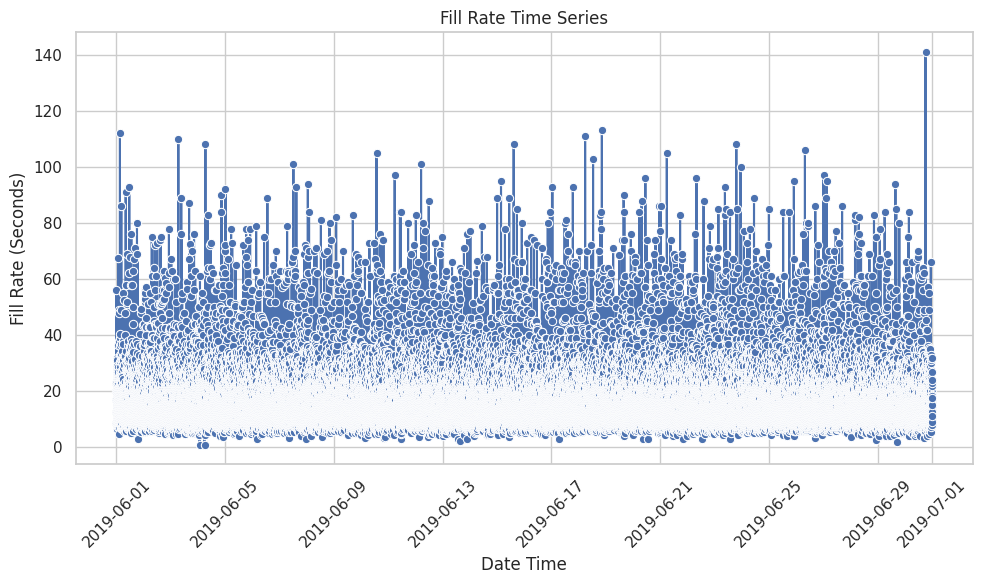

In [79]:
# Set the style of Seaborn
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=min_summary, x='date_time_min', y='fill_rate', marker='o')
plt.title('Fill Rate Time Series')
plt.xlabel('Date Time')
plt.ylabel('Fill Rate (Seconds)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


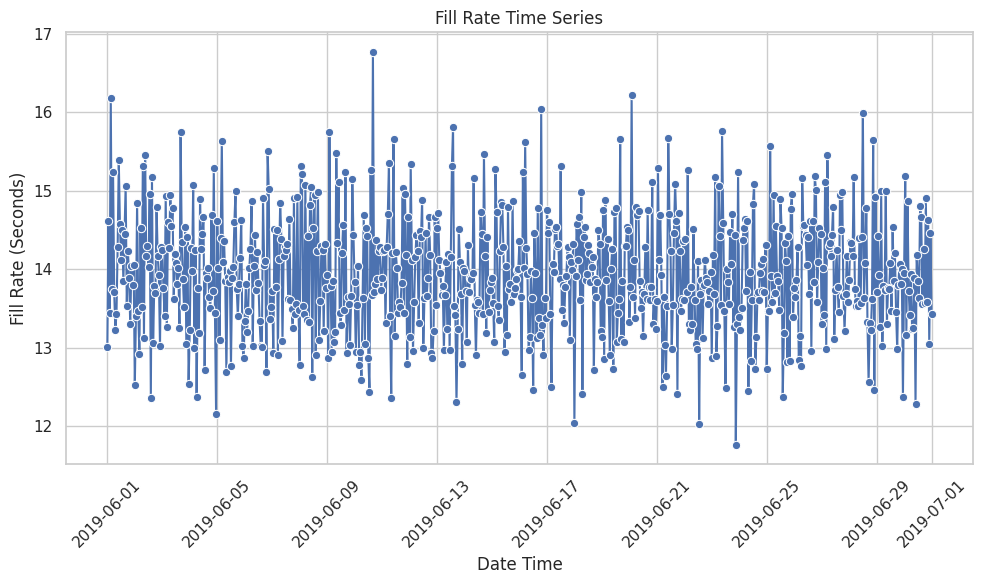

In [80]:
# Set the style of Seaborn
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=hr_summary, x='date_time_hr', y='fill_rate', marker='o')
plt.title('Fill Rate Time Series')
plt.xlabel('Date Time')
plt.ylabel('Fill Rate (Seconds)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


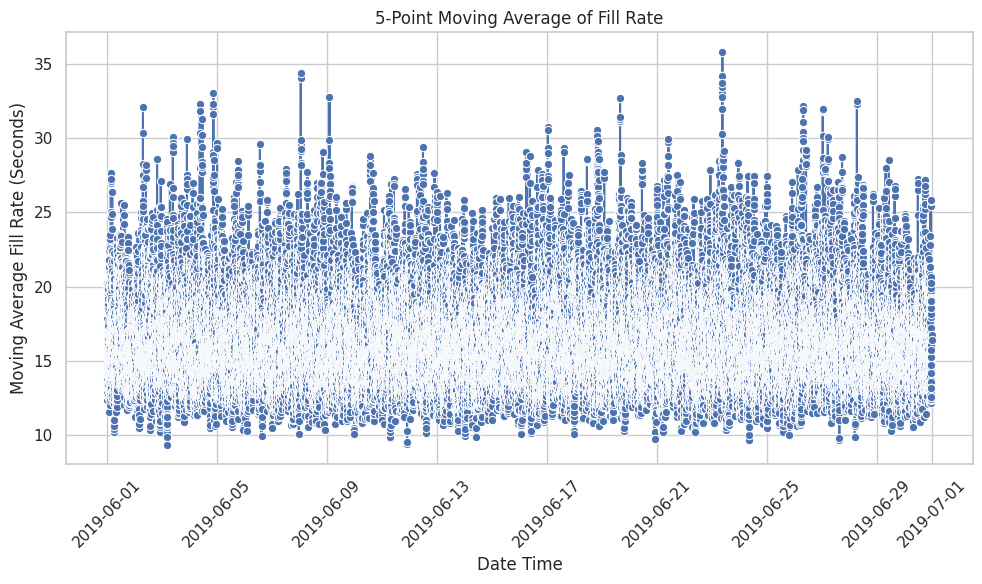

In [83]:
# Calculate moving average
min_summary['moving_avg'] = min_summary['fill_rate'].rolling(window=10).mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=min_summary, x='date_time_min', y='moving_avg', marker='o')
plt.title('5-Point Moving Average of Fill Rate')
plt.xlabel('Date Time')
plt.ylabel('Moving Average Fill Rate (Seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


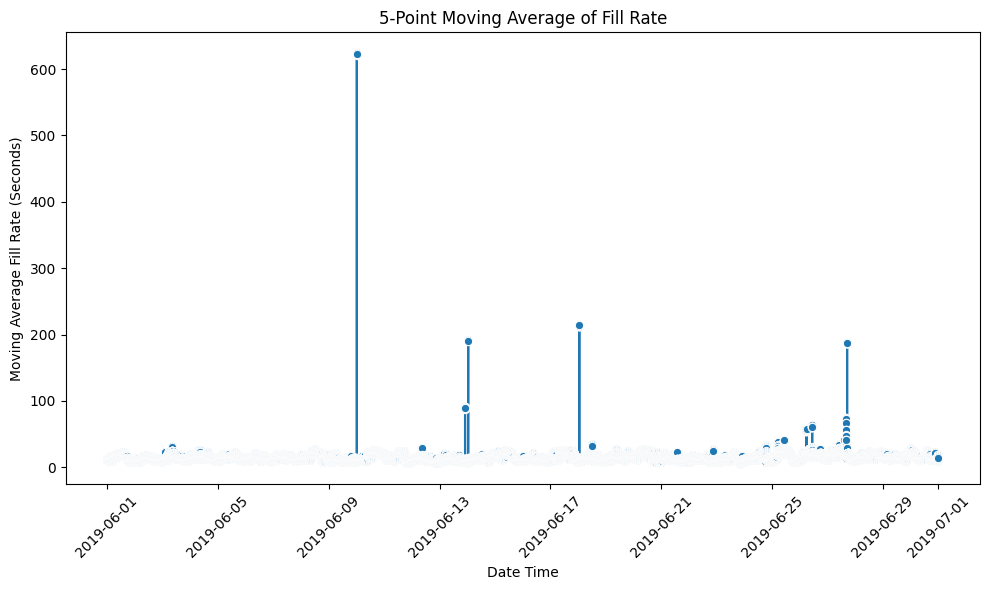

In [19]:
# Calculate moving average
min_summary['moving_avg_gas_price'] = min_summary['avg_gas_price'].rolling(window=10).mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=min_summary, x='date_time_min', y='moving_avg_gas_price', marker='o')
plt.title('5-Point Moving Average of Fill Rate')
plt.xlabel('Date Time')
plt.ylabel('Moving Average Fill Rate (Seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
